## Lab Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

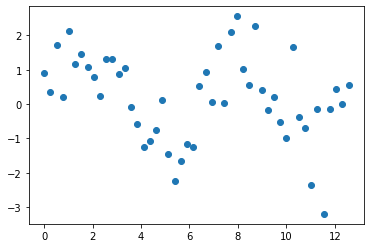

In [2]:
x = np.linspace(0,4*np.pi,50)
noise = np.random.normal(0,1,50)
target_samples = np.sin(x) + noise

plt.scatter(x,target_samples)
plt.show()

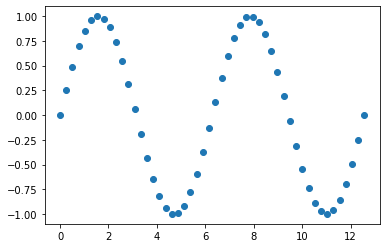

In [3]:
true_value = np.sin(x)

plt.scatter(x,true_value)
plt.show()

In [4]:
df = pd.DataFrame()
df['x'] = x
df['target_samples'] = target_samples
df

,x,target_samples
0,0.000000,0.918712
1,0.256457,0.347092
2,0.512913,1.720531
3,0.769370,0.203493
4,1.025826,2.122564
5,1.282283,1.159310
6,1.538739,1.457845
7,1.795196,1.074018
8,2.051652,0.781743
9,2.308109,0.248292


# Linear Regression

In [5]:
X = df[['x']]
y = df[['target_samples']]

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [6]:
y_pred = reg.predict(X)

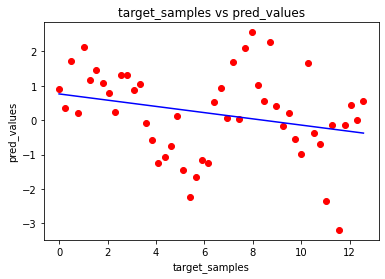

In [7]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('target_samples vs pred_values')
plt.xlabel('target_samples')
plt.ylabel('pred_values')
plt.show()

In [8]:
#Mean square error between the predicted values and the true values

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred)
MSE

0.46343339319428906

# Multiple  Linear Regression

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
dataset = pd.read_csv(r'/content/drive/MyDrive/kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
dataset.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [17]:
from sklearn.preprocessing import MinMaxScaler
dataset = dataset.loc[:,['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode']]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(dataset)
dataset = pd.DataFrame(x_scaled,columns=dataset.columns,index=dataset.index)

dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.893939
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.626263
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.136364
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.681818
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.368687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.515152
21609,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.732323
21610,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.722222
21611,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,0.143640,0.000000,0.131313


In [18]:
X = dataset.loc[:,['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode']] #TAKING ONLY NUMERICAL VALUES
y = dataset[['price']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 25)

In [20]:
from sklearn.linear_model import LinearRegression

mul_reg = LinearRegression()
mul_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = mul_reg.predict(X_test)

In [22]:
results = pd.DataFrame()
results['y_test'] = y_test
results['y_pred'] = y_pred
results

,y_test,y_pred
15431,0.121311,0.116684
12550,0.033443,0.070141
11310,0.034098,0.013173
5316,0.032266,0.082042
15298,0.033507,0.038947
...,...,...
4800,0.026098,0.068692
15608,0.029508,0.026827
10615,0.075672,0.064247
4643,0.075738,0.072698


In [23]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
MSE

0.0009740886781605897

# Polynomial Regression of Degree M

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

X = df[['x']]
y = df[['target_samples']]

pol_reg = make_pipeline(PolynomialFeatures(), LinearRegression())
parms = {'polynomialfeatures__degree': np.arange(10)}
grid = GridSearchCV(pol_reg, parms, cv = 10, scoring='neg_mean_squared_error')
grid.fit(X,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_mean_squared_error')

In [25]:
y_pred_PR = grid.predict(X)

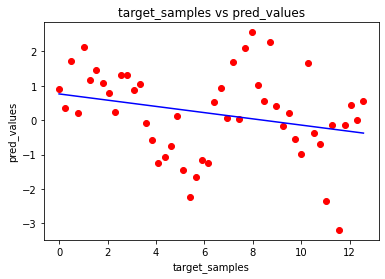

In [26]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_PR, color = 'blue')
plt.title('target_samples vs pred_values')
plt.xlabel('target_samples')
plt.ylabel('pred_values')
plt.show()

In [27]:
#Mean square error between the predicted values and the true values

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred_PR)
MSE

0.4634333931942892

# Ridge regression

In [28]:
from sklearn.linear_model import RidgeCV #automatically finds the best hyperparameter

rid = RidgeCV(alphas=np.arange(0.1, 1, 0.1), cv=5, scoring='neg_mean_squared_error')
rid.fit(X,y)

# or
# params = {'alpha' : np.arange(0,1,0.1)}
# grid_ridge = GridSearchCV(model, params, scoring= 'neg_mean_squared_error', cv= 5)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), cv=5,
        scoring='neg_mean_squared_error')

In [29]:
rid.alpha_ #best alpha value

0.9

In [30]:
y_pred_rid = rid.predict(X)

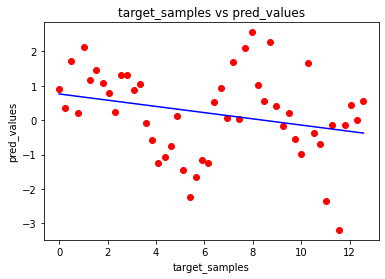

In [31]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred_rid, color = 'blue')
plt.title('target_samples vs pred_values')
plt.xlabel('target_samples')
plt.ylabel('pred_values')
plt.show()

In [32]:
#Mean square error between the predicted values and the true values

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred_rid)
MSE

0.46336950587273135

# LASSO regression 

In [33]:
from sklearn.linear_model import Lasso

params = {'alpha':np.arange(0.1, 1, 0.1)}
grid_lasso = GridSearchCV(Lasso(), params, scoring= 'neg_mean_squared_error', cv= 5) 
# Gridsearchcv helps to find out the best parameters (specific -> hyperparameter) for the particluar model
grid_lasso.fit(X,y)

#another probable method could be
# #The scikit-learn library also provides a built-in version of the algorithm that automatically 
# #finds good hyperparameters via the LassoCV class.

# from sklearn.linear_model import LassoCV

# # lasso = Lasso(alpha = 1.0)
# lasso = LassoCV(alphas=np.arange(0.1, 1, 0.1), cv=5, n_jobs=-1)
# lasso.fit(X,y)

# receiving error on lasso.alopha_

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error')

In [34]:
grid_lasso.best_params_

{'alpha': 0.1}

In [35]:
y_pred_lasso = grid_lasso.predict(X)

In [36]:
#Mean square error between the predicted values and the true values

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred_lasso)
MSE

0.4602371034255928

# Elastic-Net regression

In [37]:
from sklearn.linear_model import ElasticNet

parameters = {'l1_ratio' : np.arange(0.1, 1.1, 0.1), 'alpha' : np.arange(0.1, 1.1, 0.1)}
grid_elastic = GridSearchCV(ElasticNet(), parameters, cv= 5, n_jobs =-1)
grid_elastic.fit(X,y)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [38]:
grid_elastic.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [39]:
y_pred_enet = grid_elastic.predict(X)

In [40]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred_enet)
MSE

0.4627483745397012

# Bridge regression 

In [41]:
from sklearn.linear_model import BayesianRidge

params = {'alpha_1' : [1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01], 
          'alpha_2' : [1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01],
         'lambda_1' : [1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01],
         'lambda_2' : [1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01]}

grid_bridge = GridSearchCV(BayesianRidge(), params, cv=5, n_jobs =-1)
grid_bridge.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                     0.1],
                         'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                     0.1],
                         'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                      0.1],
                         'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                      0.1]})

In [42]:
grid_bridge.best_params_

{'alpha_1': 0.1, 'alpha_2': 1e-07, 'lambda_1': 1e-07, 'lambda_2': 0.1}

In [43]:
y_pred_br = grid_bridge.predict(X)

In [44]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(true_value, y_pred_br)
MSE

0.4629617012475496